# Лабораторная №1. Основый предобработки данных 
## Зямзина Анастасия Сергеевна и Лукашева Екатерина Валерьевна 
### 3530903/70302


#### Воспросы
1. В какой шкале представлены все признаки в наборе?<br>
2. Укажите признак с наименьшей дисперсией.<br>
3. Среднее какого признака отличается для двух классов сильнее всего?<br>
4. В каком классе больше всего skilled работников?<br>
5. Есть ли в наборе признаки с выбросами? Какие?<br>
6. Сколько пропущенных значений в наборе?<br>
7. Попытайтесь заполнить пропущенные значения.<br>
8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.<br>
9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?<br>
10. Какой признак(и) имеет смысл стандартизировать? Почему?<br>
11. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.<br>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

## Загрузка данных для анализа

In [2]:
path='credit_3530903_70302.csv'
credit_df = pd.read_csv(path, index_col=0)

<b>1. В какой шкале представлены все признаки в наборе?<br>

In [3]:
credit_df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,personal_status,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,male single,real estate,67.0,own,2.0,skilled,1.0,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,female div/dep/mar,real estate,22.0,own,1.0,skilled,1.0,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,male single,real estate,49.0,own,1.0,unskilled resident,2.0,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,male single,life insurance,45.0,for free,1.0,skilled,2.0,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,male single,no known property,53.0,for free,2.0,skilled,2.0,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0<=X<200,36.0,existing paid,furniture/equipment,9034.0,100<=X<500,<1,male single,no known property,29.0,rent,1.0,high qualif/self emp/mgmt,1.0,yes,bad
497,no checking,24.0,critical/other existing credit,furniture/equipment,1585.0,<100,4<=X<7,male single,life insurance,40.0,own,2.0,skilled,1.0,yes,good
498,0<=X<200,18.0,existing paid,radio/tv,0.0,<100,>=7,male mar/wid,real estate,32.0,own,1.0,unskilled resident,1.0,yes,good
499,>=200,6.0,critical/other existing credit,new car,1323.0,100<=X<500,>=7,male div/sep,car,28.0,own,2.0,skilled,2.0,yes,good


In [4]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 500
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   checking_status     501 non-null    object 
 1   duration            501 non-null    float64
 2   credit_history      501 non-null    object 
 3   purpose             501 non-null    object 
 4   credit_amount       501 non-null    float64
 5   savings_status      501 non-null    object 
 6   employment          501 non-null    object 
 7   personal_status     501 non-null    object 
 8   property_magnitude  501 non-null    object 
 9   age                 501 non-null    float64
 10  housing             474 non-null    object 
 11  existing_credits    501 non-null    float64
 12  job                 501 non-null    object 
 13  num_dependents      501 non-null    float64
 14  foreign_worker      501 non-null    object 
 15  class               501 non-null    object 
dtypes: float

### Ответ:
checking_status - порядковая

duration - абсолютная

credit_history - номинальная

purpose - номинальная

credi_amount - абсолютная

saving_status - порядковая

employment - порядковая

personal_status - номинальная

property_magnitude - номинальная

age - абсолютная

housing - номинальная

existing_credits - порядковая

job - порядковая

num_dependents - порядковая

foreign_worker - номинальная

class - номинальная

<b>2. Укажите признак с наименьшей дисперсией.

In [5]:
print("All variances:\n",credit_df.var(), "\n",
'\nexisting_credits variance:', credit_df['existing_credits'].var(),'\nnum_dependents variance:',credit_df['num_dependents'].var())

All variances:
 duration            1.465e+02
credit_amount       2.657e+07
age                 1.378e+02
existing_credits    3.231e-01
num_dependents      1.233e-01
dtype: float64 
 
existing_credits variance: 0.3230738522954092 
num_dependents variance: 0.12330538922155689


### Ответ:
Из полученных выше данных видно, что наименьшая дисперсия у признака num_dependents

<b>3. Среднее какого признака отличается для двух классов сильнее всего?

Разница средних для различных классов:
 duration               6.799
credit_amount       2011.709
age                    0.792
existing_credits       0.019
num_dependents         0.013
dtype: float64


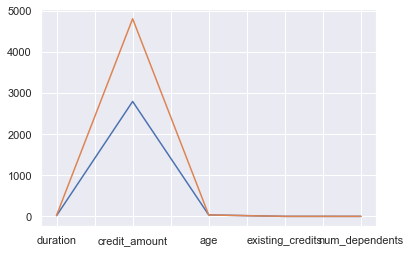

In [6]:
credit_df.loc[credit_df['class'] == 'good'].mean().plot(kind='line')
credit_df.loc[credit_df['class'] == 'bad'].mean().plot(kind='line')
print("Разница средних для различных классов:\n",abs(credit_df[credit_df['class'] == 'good'].mean() - credit_df[credit_df['class'] == 'bad'].mean()))

In [7]:
credit_df.loc[credit_df['existing_credits'] == 4]

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,personal_status,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
65,no checking,27.0,existing paid,repairs,5190.0,no known savings,>=7,male single,life insurance,48.0,own,4.0,skilled,2.0,yes,good
197,0<=X<200,12.0,existing paid,furniture/equipment,951.0,100<=X<500,<1,female div/dep/mar,car,27.0,NaN,4.0,skilled,1.0,yes,bad


### Ответ:
Как из графика, так и из вычисления модуля разности средних признаков разных классов, можно сделать вывод, что среднее наиболее отличается для признака credit_amount

<b>4. В каком классе больше всего skilled работников?

<AxesSubplot:>

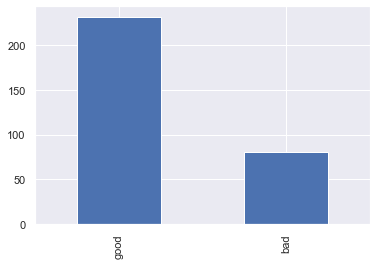

In [8]:
credit_df[credit_df['job'] == 'skilled']['class'].value_counts().plot(kind='bar')

### Ответ:
В классе good


<b> 5. Есть ли в наборе признаки с выбросами? Какие?

<AxesSubplot:>

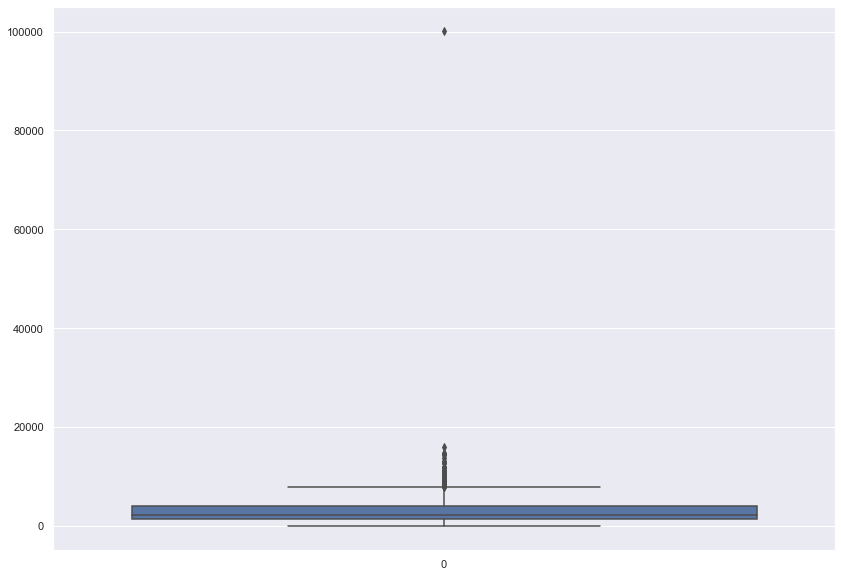

In [9]:
fig, axs = plt.subplots(figsize=(14,10))
sns.boxplot(data=credit_df['credit_amount'])

<font color='green'>

In [10]:
credit_df['credit_amount'] = credit_df.credit_amount.clip(lower=credit_df.credit_amount.quantile(0.05), 
                                                  upper=credit_df.credit_amount.quantile(0.95))

<AxesSubplot:>

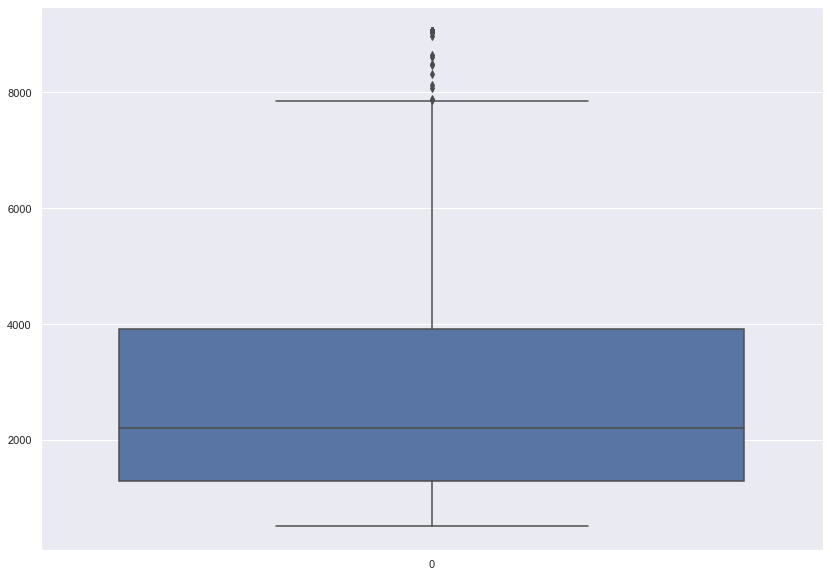

In [11]:
fig, axs = plt.subplots(figsize=(14,10))
sns.boxplot(data=credit_df['credit_amount'])

<AxesSubplot:>

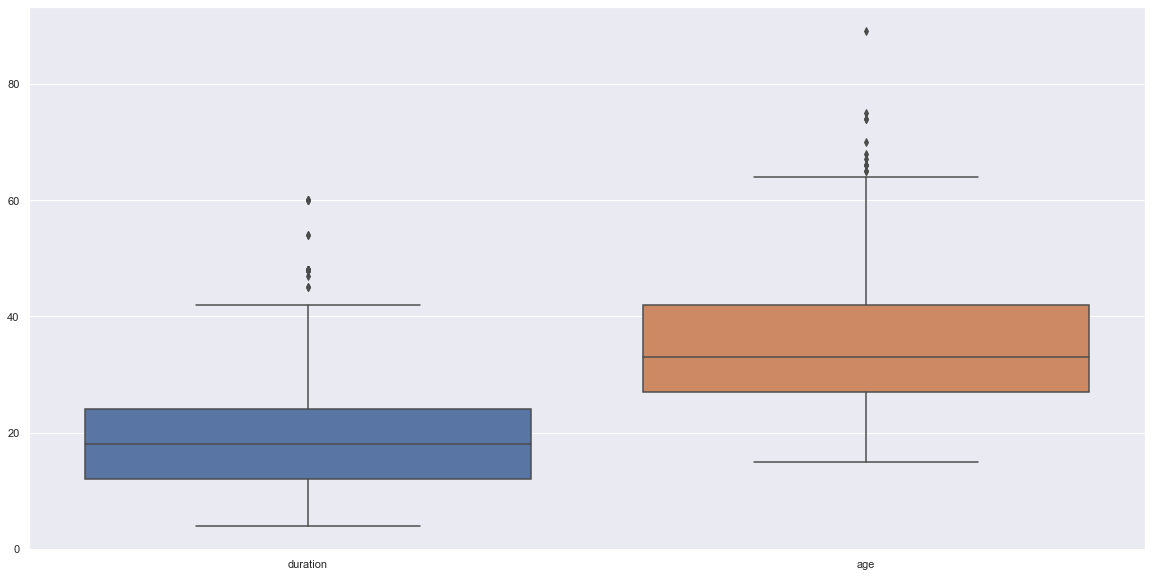

In [12]:
fig, axs = plt.subplots(figsize=(20,10))
sns.boxplot(data=credit_df.loc[:,['duration','age']])

### Ответ:
Да, в наборе есть выбросы. Выбросы есть в признаках duration, age, credit_amount

<b>6. Сколько пропущенных значений в наборе?

In [13]:
path='credit_3530903_70302.csv'
credit_df = pd.read_csv(path, index_col=0)
credit_df.describe()

,duration,credit_amount,age,existing_credits,num_dependents
count,501.000,501.000,501.000,501.000,501.000
mean,20.315,3344.756,35.605,1.393,1.144
std,12.103,5154.839,11.740,0.568,0.351
min,4.000,0.000,15.000,1.000,1.000
25%,12.000,1288.000,27.000,1.000,1.000
50%,18.000,2197.000,33.000,1.000,1.000
75%,24.000,3915.000,42.000,2.000,1.000
max,60.000,100042.000,89.000,4.000,2.000


In [14]:
no_zero_columns = list (set(credit_df.columns) -  set(['duration','credit_amount','age']))

In [15]:
"""credit_df.loc[:, no_zero_columns] = credit_df[no_zero_columns].replace()
credit_df['purpose'].value_counts()
for column in credit_df.columns:
    print(credit_df[column].value_counts())"""

"credit_df.loc[:, no_zero_columns] = credit_df[no_zero_columns].replace()\ncredit_df['purpose'].value_counts()\nfor column in credit_df.columns:\n    print(credit_df[column].value_counts())"

In [16]:
credit_df.isnull().sum()

checking_status        0
duration               0
credit_history         0
purpose                0
credit_amount          0
savings_status         0
employment             0
personal_status        0
property_magnitude     0
age                    0
housing               27
existing_credits       0
job                    0
num_dependents         0
foreign_worker         0
class                  0
dtype: int64

### Ответ:
housing: 27

<font color='green'>

<b>7. Попытайтесь заполнить пропущенные значения.<br>

1. Можно было удалить строки с пропущенными знаками, но таких 27 из 501 - 6%, что не так много
2. Можно заменить произвольными значениями - модой, медианой или средним

(474, 16) (501, 16)


<AxesSubplot:>

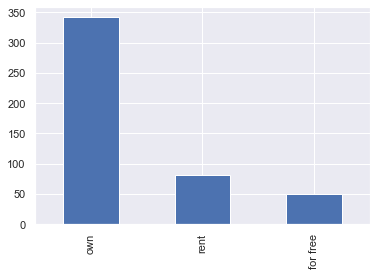

In [17]:
path='credit_3530903_70302.csv'
credit_df = pd.read_csv(path, index_col=0)
import random

# Удаляем строки
credit_without_na = credit_df.dropna(how='any', axis=0)
print(credit_without_na.shape, credit_df.shape)


credit_without_na['housing'].value_counts().plot(kind='bar')

          duration  credit_amount     age  existing_credits  num_dependents
housing                                                                    
for free    26.780       5180.140  47.300             1.520           1.280
own         20.061       3141.775  35.085             1.392           1.135
rent        19.232       3451.280  30.585             1.268           1.098
own         342
rent         82
for free     50
Name: housing, dtype: int64
own         342
rent         82
for free     50
Name: housing, dtype: int64


own         342
rent         82
for free     77
Name: housing, dtype: int64

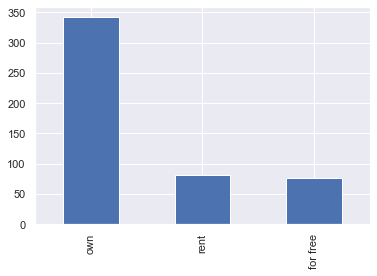

In [18]:
print(credit_df.groupby(['housing']).mean())

print(credit_df['housing'].value_counts())

house_choice = ['own', 'rent', 'for free']

credit_withoutNan = credit_df['housing'].replace(np.NaN,house_choice[random.randint(0,2)])
print(credit_df['housing'].value_counts())

credit_withoutNan.value_counts().plot(kind='bar')
credit_withoutNan.value_counts()

<font color='green'>

<b> 8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.

<AxesSubplot:>

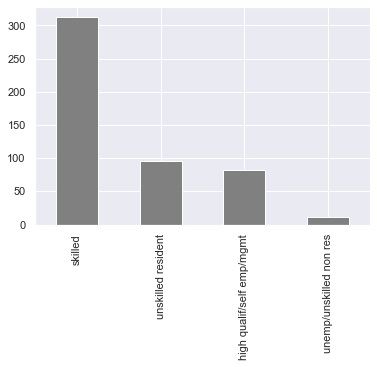

In [19]:
credit_df.loc[:,'job'].value_counts().plot(kind='bar',color="grey")

c:\users\анастасия\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

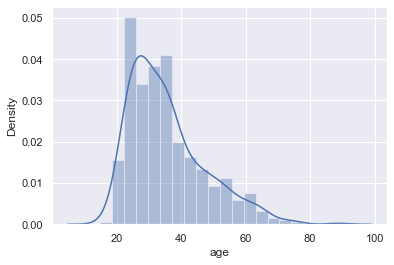

In [20]:
sns.distplot(credit_df['age'])

Text(0, 0.5, 'Class')

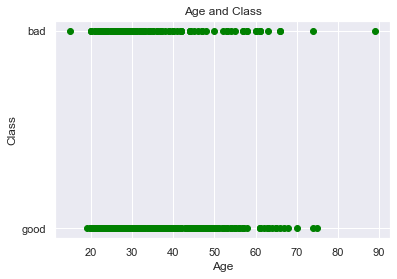

In [21]:
plt.scatter(credit_df['age'], credit_df['class'], color='green')
plt.title('Age and Class')
plt.xlabel('Age')
plt.ylabel('Class')

<b>9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?<br>

Text(0, 0.5, 'Duration')

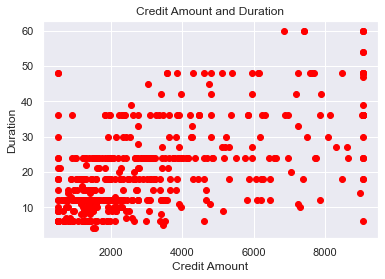

In [22]:
"""
Для удобства оценки обработаем выбросы
"""
credit_df['credit_amount'] = credit_df.credit_amount.clip(lower=credit_df.credit_amount.quantile(0.05), 
                                                  upper=credit_df.credit_amount.quantile(0.95))

plt.scatter(credit_df['credit_amount'], credit_df['duration'], color='red')
plt.title('Credit Amount and Duration')
plt.xlabel('Credit Amount')
plt.ylabel('Duration')

Text(0, 0.5, 'Purpose')

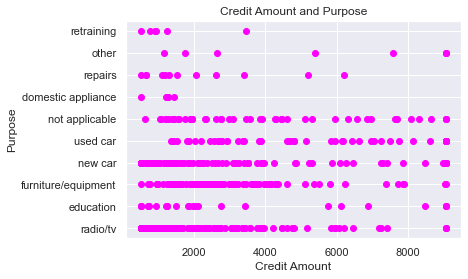

In [23]:
plt.scatter(credit_df['credit_amount'], credit_df['purpose'], color='magenta')
plt.title('Credit Amount and Purpose')
plt.xlabel('Credit Amount')
plt.ylabel('Purpose')

c:\users\анастасия\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


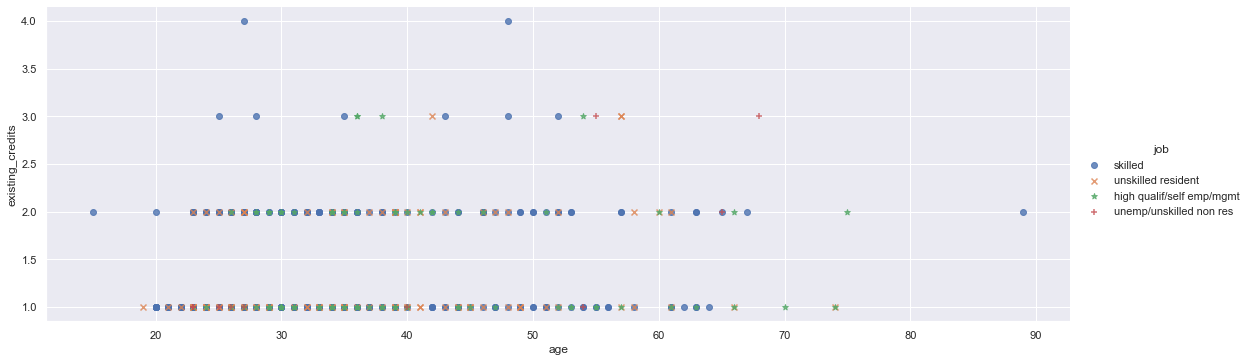

In [24]:
sns.lmplot('age', 'existing_credits', data=credit_df, hue='job', fit_reg=False,markers=["o", "x","*","+"], aspect=3);

In [25]:
num_columns = list(set(credit_df.columns) -  set(['purpose','class','personal_status','employment','foreign_worker','credit_history','checking_status',
                                                  'job','savings_status','housing','property_magnitude']))
num_columns = ['duration', 'existing_credits', 'num_dependents', 'credit_amount', 'age']
#sns.pairplot(credit_df[num_columns])

<AxesSubplot:>

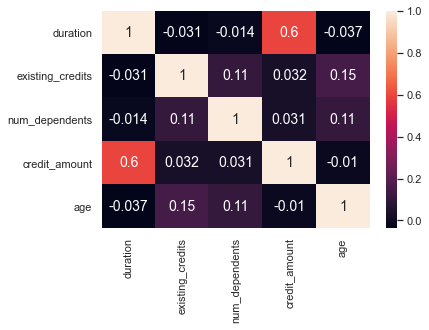

In [26]:
corr_matrix =credit_df[num_columns].corr()
sns.heatmap(corr_matrix, annot=True, annot_kws={"size":14})

<font color='green'>

<b>10. Какой признак(и) имеет смысл стандартизировать? Почему?

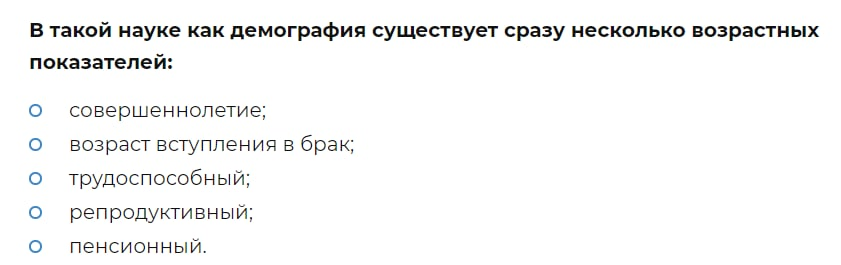

In [27]:
bins = [0,12,19,35,60,100]
group_names = ['Child', 'Teenager', 'Young', 'Adult','Elderly']
credit_df['age_rate'] = pd.cut(credit_df['age'], bins, labels=group_names)
bins = [15,25,30,40,60,100]
group_names = ['adult', 'marrige age', 'employable', 'reproductive','pensionary']
credit_df['age_expert'] = pd.cut(credit_df['age'], bins, labels=group_names)
credit_df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,personal_status,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class,age_rate,age_expert
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,male single,real estate,67.0,own,2.0,skilled,1.0,yes,good,Elderly,pensionary
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,female div/dep/mar,real estate,22.0,own,1.0,skilled,1.0,yes,bad,Young,adult
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,male single,real estate,49.0,own,1.0,unskilled resident,2.0,yes,good,Adult,reproductive
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,male single,life insurance,45.0,for free,1.0,skilled,2.0,yes,good,Adult,reproductive
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,male single,no known property,53.0,for free,2.0,skilled,2.0,yes,bad,Adult,reproductive


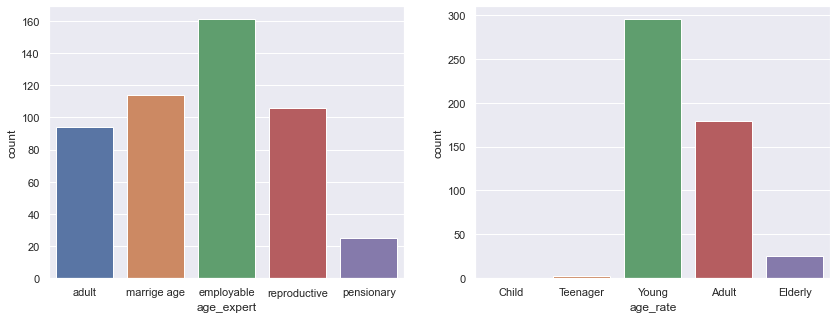

In [28]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

sns.countplot(x='age_expert', data=credit_df, ax=axes[0]);
sns.countplot(x='age_rate', data=credit_df, ax=axes[1]);

In [29]:
credit_df['duration_cut'] = pd.cut(credit_df['duration'], 5)
credit_df['duration_cut'].value_counts()
bins = [0,12,24,100]
group_names = ['low', 'average', 'long']
credit_df['duration_rate'] = pd.cut(credit_df['duration'], bins, labels=group_names)
credit_df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,personal_status,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class,age_rate,age_expert,duration_cut,duration_rate
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,male single,real estate,67.0,own,2.0,skilled,1.0,yes,good,Elderly,pensionary,"(3.944, 15.2]",low
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,female div/dep/mar,real estate,22.0,own,1.0,skilled,1.0,yes,bad,Young,adult,"(37.6, 48.8]",long
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,male single,real estate,49.0,own,1.0,unskilled resident,2.0,yes,good,Adult,reproductive,"(3.944, 15.2]",low
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,male single,life insurance,45.0,for free,1.0,skilled,2.0,yes,good,Adult,reproductive,"(37.6, 48.8]",long
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,male single,no known property,53.0,for free,2.0,skilled,2.0,yes,bad,Adult,reproductive,"(15.2, 26.4]",average


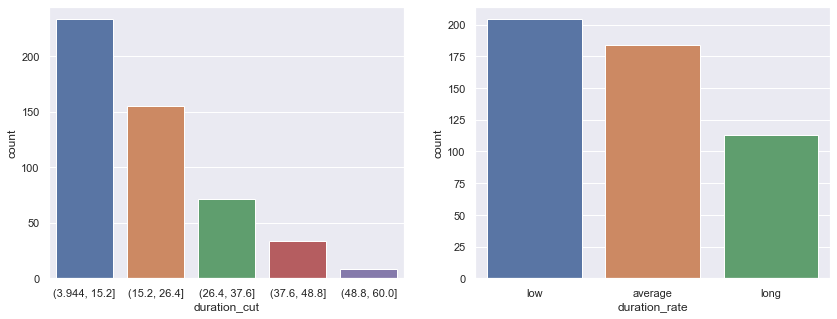

In [30]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

sns.countplot(x='duration_cut', data=credit_df, ax=axes[0]);
sns.countplot(x='duration_rate', data=credit_df, ax=axes[1]);

<font color='green'>

<b>11. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.

Наличие задолженностей по ЖКХ, штрафам ГИБДД, налогововым и иным обязательным платежам. Это показывает отвественность и платежеспособность гражданина.

Это номальный признак.

<font color='green'>